In [100]:
from ultralytics import YOLO
import pandas as pd


In [101]:
model = YOLO(r"C:/Users/james/Desktop/Diss_Code_for_AUC/Pretrained_models/yolov8n-pose.pt")

In [102]:
meta_points_disc = {"p1": "nose",
                    "p2": "L_eye",
                    "p3": "R_eye",
                    "p4": "L_ear",
                    "p5": "R_ear",
                    "p6": "L_shoulder",
                    "p7": "R_shoulder",
                    "p8": "L_elbow",
                    "p9": "R_elbow",
                    "p10": "L_wrist",
                    "p11": "R_wrist",
                    "p12": "L_hip",
                    "p13": "R_hip",
                    "p14": "L_Knee",
                    "p15": "R_Knee",
                    "p16": "L_ankle",
                    "p17": "R_ankle",
                    "p18": "Top_left_box",
                    "p19": "Top_right_box",
                    "p20": "Bottom_right_box",
                    "p21": "Bottom_right_box",
                    "p22": "Top_left_box_sw",
                    "p23": "Top_right_box_sw",
                    "p24": "Bottom_left_box_sw",
                    "p25": "Bottom_right_box_sw"
                    }


image 1/1 c:\Users\james\Desktop\Diss_Code_for_AUC\Yolo_landmark_model\Test_images\522.jpg: 384x640 1 person, 94.2ms
Speed: 3.0ms preprocess, 94.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


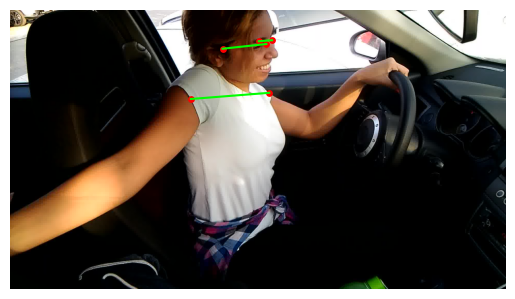

In [142]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
directory = "Test_images/522.jpg"
result = model(directory)

list_coords = result[0].keypoints.xyn[0]
transpose_list_coords = np.array(list_coords).T
show_points=[1,2,3,4,5,6]

meta_point_links = {0: [],
        1: [2],
        2: [],
        3: [4],
        4: [],
        5: [6],
        6: [],
        7: [],
        8: [],
        9: [],
        10: [],
        11: [],
        12: []}

p1 = []
p2 = []

for key, values in meta_point_links.items():
    for value in values:
        if value != None:
            p1.append(key)  
            p2.append(value)


           
img = mpimg.imread(directory)
ylim = len(img)
xlim = len(img[0])
imgplot = plt.imshow(img)

x_coordinates_scatter = [transpose_list_coords[0][i] for i in show_points]
y_coordinates_scatter = [transpose_list_coords[1][i] for i in show_points]
x_coordinates_scatter = [x*xlim for x in x_coordinates_scatter]
y_coordinates_scatter = [y*ylim for y in y_coordinates_scatter]
x_coordinates_line = transpose_list_coords[0]
y_coordinates_line = transpose_list_coords[1]
x_coordinates_line = [x*xlim for x in x_coordinates_line]
y_coordinates_line = [y*ylim for y in y_coordinates_line]

for i, point in enumerate(p1):
    x = [x_coordinates_line[point], x_coordinates_line[p2[i]]]
    y = [y_coordinates_line[point], y_coordinates_line[p2[i]]]
    # if i == 0 or i== 5:
    plt.plot(x, y, c= "lime")
    # else:
    #     plt.plot(x, y, c= "fuchsia")
# x = [x_coordinates_line[10], 0.55*xlim]
# y = [y_coordinates_line[10], 0.55*ylim]
# plt.plot(x, y, c= "lime")

plt.scatter(x_coordinates_scatter, y_coordinates_scatter, c='red', marker='o', s=15)
# plt.scatter(0.55*xlim, 0.55*ylim, c='red', marker='o', s=15)
plt.axis("off")
plt.show()